# Comparing SGD to GD
We'll do some simple comparisons between SGD and GD. We will consider mostly convex problems, like classification and regression.
Remember, that what we would like to minimize is a finite sum of losses
$$\min_{\bf x} \frac{1}{n} \sum_{i=1}^n f_i({\bf x}) $$
The algorithmic iteration of SGD is
$${\bf x}_{k+1} = {\bf x}_k -\gamma_{SGD}\cdot \nabla f_{s_k} ({\bf x}_k)$$
That of Gradient Descent (GD) is given by
$${\bf x}_{k+1} = {\bf x}_k -\gamma_{GD}\cdot \frac{1}{n} \sum_{i=1}^n \nabla f_i({\bf x})$$


Let's try a simple linear regression problem, where we wnat to solve
$$\min_{\bf w} \frac{1}{n} \sum_{i=1}^n ({\bf x}_i^T{\bf w}-y_i)^2$$

# Example of train vs test error, in lin. regression

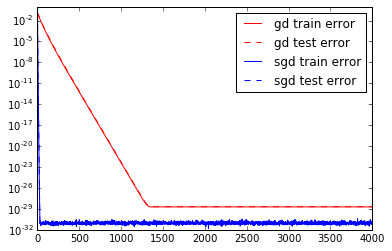

In [126]:
import numpy as np; 
from scipy import linalg; 
import matplotlib.pyplot as plt
import random

%matplotlib inline

# Parameters for sgd and gd on gaussian linear regression
d = 10; 
n = 200; 
n_test = 100; 
X = np.mat(np.random.rand(n,d))
w_opt = np.mat(np.random.rand(d,1))
y = X * w_opt
T = 4000;

# Initial models for both sgd and gd are the same
gd_w = np.mat(np.random.rand(d,1))
sgd_w = gd_w

# Test data
X_test = np.mat(np.random.rand(n_test,d))
y_test = X_test * w_opt

gd_gamma = .001
gd_train_loss = np.zeros(T)
gd_test_loss = np.zeros(T)

sgd_gamma = .05
sgd_train_loss = np.zeros(T)
sgd_test_loss = np.zeros(T)
sgd_datapoint_order = list(range(0, n))

for i in range(T):
    
    # Compute errors
    gd_train_error = linalg.norm(X*gd_w-y)
    gd_test_error = linalg.norm(X_test*gd_w-y_test)    
    sgd_train_error = linalg.norm(X*sgd_w-y)
    sgd_test_error = linalg.norm(X_test*sgd_w-y_test)
    
    #if i == 200:
    #    break
    
    # Update train and test loss
    gd_train_loss[i] = (gd_train_error**2)/n
    gd_test_loss[i] = (gd_test_error**2)/(n_test)
    sgd_train_loss[i] = (sgd_train_error**2)/n
    sgd_test_loss[i] = (sgd_test_error**2)/(n_test)

    # Update for GD
    gd_w = gd_w - gd_gamma*2*(X.T*X*gd_w- X.T*y)

    # Update for SGD. We shuffle the datapoint order, then compute updates iteratively.
    random.shuffle(sgd_datapoint_order)
    for datapoint_index in sgd_datapoint_order:
        gradient_at_dp = (2 * (X[datapoint_index] * sgd_w - y[datapoint_index])) * X[datapoint_index]
        sgd_w = sgd_w - sgd_gamma * gradient_at_dp.T
    
plt.semilogy(range(T), gd_train_loss, 'r-', label="gd train error")
plt.semilogy(range(T), gd_test_loss, '--r', label="gd test error")
plt.semilogy(range(T), sgd_train_loss, 'b-', label="sgd train error")
plt.semilogy(range(T), sgd_test_loss, '--b', label="sgd test error")
plt.legend(loc="upper right")
plt.show(); 

